In [3]:
# .csv file manipulations
# this code should work with any downloaded csv from the CITES Trade database
#

In [1]:
# Import Dependencies
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

In [2]:
# Grab the data files!
# Country code
CountryCodeISO_df = pd.read_excel('Country_code.xlsx') 
print(CountryCodeISO_df.columns.get_values())
CountryCodeISO_df.head(3)

['Country Name' 'Country Code']


,Country Name,Country Code
0,Afghanistan,AF
1,Aland Islands,AX
2,Albania,AL


In [3]:
# CITES source
CitesSource_df = pd.read_excel('CITES_Source.xlsx') 
print(CitesSource_df.columns.get_values())
CitesSource_df.head(3)

['Source Code' 'Source Description']


,Source Code,Source Description
0,A,Plants that are artificially propagated in acc...
1,C,Animals bred in captivity in accordance with R...
2,D,Appendix-I animals bred in captivity for comme...


In [4]:
# CITES purpose
CitesPurpose_df = pd.read_excel('CITES_Purpose.xlsx') 
print(CitesPurpose_df.columns.get_values())
CitesPurpose_df.head(3)

['Purpose Code' 'Purpose Description']


,Purpose Code,Purpose Description
0,B,Breeding in captivity or artificial propagation
1,E,Educational
2,G,Botanical garden


In [5]:
# CITES data to analyze
#CITES_data_df = pd.read_csv('CITES2017.csv') 
CITES_data_df = pd.read_csv('WildlifeTrade2016-2017.csv') 
print(CITES_data_df.columns.get_values())
CITES_data_df.head(3)


['Year' 'App.' 'Taxon' 'Class' 'Order' 'Family' 'Genus' 'Importer'
 'Exporter' 'Origin' 'Importer reported quantity'
 'Exporter reported quantity' 'Term' 'Unit' 'Purpose' 'Source']


,Year,App.,Taxon,Class,Order,Family,Genus,Importer,Exporter,Origin,Importer reported quantity,Exporter reported quantity,Term,Unit,Purpose,Source
0,2016,I,Aquila heliaca,Aves,Falconiformes,Accipitridae,Aquila,TR,NL,CZ,NaN,1.0,bodies,NaN,T,C
1,2016,I,Aquila heliaca,Aves,Falconiformes,Accipitridae,Aquila,XV,RS,RS,NaN,1.0,bodies,NaN,Q,O
2,2016,I,Haliaeetus albicilla,Aves,Falconiformes,Accipitridae,Haliaeetus,BE,NO,NaN,NaN,43.0,feathers,NaN,S,W


In [6]:
# Add the CITES Purpose description
temp_df1 = pd.merge(CITES_data_df, CitesPurpose_df, 
                    left_on=  ['Purpose'],
                   right_on= ['Purpose Code'], 
                   how = 'inner')

#print(temp_df1.columns.get_values())
# drop the purpose code column
del temp_df1['Purpose Code']
print(temp_df1.columns.get_values())
temp_df1.head(3)


['Year' 'App.' 'Taxon' 'Class' 'Order' 'Family' 'Genus' 'Importer'
 'Exporter' 'Origin' 'Importer reported quantity'
 'Exporter reported quantity' 'Term' 'Unit' 'Purpose' 'Source'
 'Purpose Description']


,Year,App.,Taxon,Class,Order,Family,Genus,Importer,Exporter,Origin,Importer reported quantity,Exporter reported quantity,Term,Unit,Purpose,Source,Purpose Description
0,2016,I,Aquila heliaca,Aves,Falconiformes,Accipitridae,Aquila,TR,NL,CZ,NaN,1.0,bodies,NaN,T,C,Commercial
1,2016,I,Acipenser brevirostrum,Actinopteri,Acipenseriformes,Acipenseridae,Acipenser,CH,DE,NaN,NaN,4.0,live,NaN,T,C,Commercial
2,2016,I,Branta sandvicensis,Aves,Anseriformes,Anatidae,Branta,SG,NL,NaN,NaN,4.0,live,NaN,T,C,Commercial


In [7]:
# Add the CITES Source description
temp_df2 = pd.merge(temp_df1, CitesSource_df, 
                    left_on=  ['Source'],
                   right_on= ['Source Code'], 
                   how = 'inner')
#print(temp_df2.columns.get_values())
# drop the Source code column
del temp_df2['Source Code']
print(temp_df2.columns.get_values())
temp_df2.head(3)


['Year' 'App.' 'Taxon' 'Class' 'Order' 'Family' 'Genus' 'Importer'
 'Exporter' 'Origin' 'Importer reported quantity'
 'Exporter reported quantity' 'Term' 'Unit' 'Purpose' 'Source'
 'Purpose Description' 'Source Description']


,Year,App.,Taxon,Class,Order,Family,Genus,Importer,Exporter,Origin,Importer reported quantity,Exporter reported quantity,Term,Unit,Purpose,Source,Purpose Description,Source Description
0,2016,I,Aquila heliaca,Aves,Falconiformes,Accipitridae,Aquila,TR,NL,CZ,NaN,1.0,bodies,NaN,T,C,Commercial,Animals bred in captivity in accordance with R...
1,2016,I,Acipenser brevirostrum,Actinopteri,Acipenseriformes,Acipenseridae,Acipenser,CH,DE,NaN,NaN,4.0,live,NaN,T,C,Commercial,Animals bred in captivity in accordance with R...
2,2016,I,Branta sandvicensis,Aves,Anseriformes,Anatidae,Branta,SG,NL,NaN,NaN,4.0,live,NaN,T,C,Commercial,Animals bred in captivity in accordance with R...


In [8]:
# Add the Importer Country description
temp_df3 = pd.merge(temp_df2, CountryCodeISO_df,
                    left_on=  ['Importer'],
                    right_on= ['Country Code'], 
                    how = 'inner')
print(temp_df3.columns.get_values())
# drop the Country code column
del temp_df3['Country Code']
temp_df3 = temp_df3.rename(columns={'Country Name':'Importer Country Name'})
print(temp_df3.columns.get_values())
temp_df3.head(3)

['Year' 'App.' 'Taxon' 'Class' 'Order' 'Family' 'Genus' 'Importer'
 'Exporter' 'Origin' 'Importer reported quantity'
 'Exporter reported quantity' 'Term' 'Unit' 'Purpose' 'Source'
 'Purpose Description' 'Source Description' 'Country Name' 'Country Code']
['Year' 'App.' 'Taxon' 'Class' 'Order' 'Family' 'Genus' 'Importer'
 'Exporter' 'Origin' 'Importer reported quantity'
 'Exporter reported quantity' 'Term' 'Unit' 'Purpose' 'Source'
 'Purpose Description' 'Source Description' 'Importer Country Name']


,Year,App.,Taxon,Class,Order,Family,Genus,Importer,Exporter,Origin,Importer reported quantity,Exporter reported quantity,Term,Unit,Purpose,Source,Purpose Description,Source Description,Importer Country Name
0,2016,I,Aquila heliaca,Aves,Falconiformes,Accipitridae,Aquila,TR,NL,CZ,NaN,1.0,bodies,NaN,T,C,Commercial,Animals bred in captivity in accordance with R...,Turkey
1,2016,I,Saguinus oedipus,Mammalia,Primates,Cebidae,Saguinus,TR,DE,NaN,5.0,5.0,live,NaN,T,C,Commercial,Animals bred in captivity in accordance with R...,Turkey
2,2016,I,Crocodylus niloticus,Reptilia,Crocodylia,Crocodylidae,Crocodylus,TR,CH,ZW,5.0,NaN,leather products (small),NaN,T,C,Commercial,Animals bred in captivity in accordance with R...,Turkey


In [9]:
# Add the Exporter Country description
temp_df4 = pd.merge(temp_df3, CountryCodeISO_df,
                    left_on=  ['Exporter'],
                    right_on= ['Country Code'], 
                    how = 'inner')
#print(temp_df4.columns.get_values())
# drop the Country code column
del temp_df4['Country Code']
temp_df4 = temp_df4.rename(columns={'Country Name':'Exporter Country Name'})
print(temp_df4.columns.get_values())
temp_df4.head()

['Year' 'App.' 'Taxon' 'Class' 'Order' 'Family' 'Genus' 'Importer'
 'Exporter' 'Origin' 'Importer reported quantity'
 'Exporter reported quantity' 'Term' 'Unit' 'Purpose' 'Source'
 'Purpose Description' 'Source Description' 'Importer Country Name'
 'Exporter Country Name']


,Year,App.,Taxon,Class,Order,Family,Genus,Importer,Exporter,Origin,Importer reported quantity,Exporter reported quantity,Term,Unit,Purpose,Source,Purpose Description,Source Description,Importer Country Name,Exporter Country Name
0,2016,I,Aquila heliaca,Aves,Falconiformes,Accipitridae,Aquila,TR,NL,CZ,NaN,1.0,bodies,NaN,T,C,Commercial,Animals bred in captivity in accordance with R...,Turkey,Netherlands
1,2016,I,Panthera tigris,Mammalia,Carnivora,Felidae,Panthera,TR,NL,HU,NaN,1.0,bodies,NaN,T,C,Commercial,Animals bred in captivity in accordance with R...,Turkey,Netherlands
2,2016,I,Lemur catta,Mammalia,Primates,Lemuridae,Lemur,TR,NL,NaN,NaN,1.0,bodies,NaN,T,C,Commercial,Animals bred in captivity in accordance with R...,Turkey,Netherlands
3,2016,II,Caiman crocodilus,Reptilia,Crocodylia,Alligatoridae,Caiman,TR,NL,CO,1.0,NaN,leather products (small),NaN,T,C,Commercial,Animals bred in captivity in accordance with R...,Turkey,Netherlands
4,2016,II,Caiman crocodilus fuscus,Reptilia,Crocodylia,Alligatoridae,Caiman,TR,NL,CO,NaN,5.0,leather products (small),NaN,T,C,Commercial,Animals bred in captivity in accordance with R...,Turkey,Netherlands


In [10]:
#######################################################
#Here is the block for data cleaning that you can plut into your code
#The final dataframe is deduped_df

tobecleaned_df =[]
dropnacolumns_df=[]
deduped_df=[]

tobecleaned_df = temp_df4.copy()
tobecleaned_df.shape #totally 60627 rows

#drop columns with all NA values
dropnacolumns_df=tobecleaned_df.dropna(axis=1, how='all')
#len(dropnacolumns_df.columns) #20 column
#len(tobecleaned_df.columns) #20 columns

#remove deduplicates
deduped_df=dropnacolumns_df.drop_duplicates()
deduped_df.shape #removed 3 duplicate rows

#remove column with 89.67% null values
try:
    del deduped_df['Unit'] # This should be run only once, second time will fail since column no longer exist
    #deduped_df.head(1)
except:
    print('column was already removed')

#removed unneeded dataset: the plant (Source is 'A')
#deduped_df.drop(deduped_df[deduped_df.Source=='A'].index, inplace=True)
deduped_df=deduped_df.drop(deduped_df[deduped_df.Source=='A'].index)
deduped_df.shape #49376, 19

#drop the row with 0 quality
deduped_df=deduped_df.drop(deduped_df[deduped_df['Importer reported quantity']==0].index)
#deduped_df.shape
#deduped_df.columns.values
#######################################################

In [11]:
columnsnames=['Year','App.', 'Taxon', 'Class','Order','Family', 'Genus','Importer','Exporter','Origin'
              ,'Importer reported quantity','Exporter reported quantity','Term','Purpose','Source']

nulldict={}
for col in columnsnames:
    deduped_df[col].isnull().sum()
    nulldict[col]=deduped_df[col].isnull().sum()/deduped_df[col].count()*100
    
nulldict    

{'App.': 0.0,
 'Class': 7.3883161512027495,
 'Exporter': 1.1616948041304704,
 'Exporter reported quantity': 52.67942731686199,
 'Family': 0.84351129447326501,
 'Genus': 2.0756238241921814,
 'Importer': 0.081078341947907168,
 'Importer reported quantity': 99.092741935483872,
 'Order': 0.026336047972124306,
 'Origin': 103.11407297708668,
 'Purpose': 0.0,
 'Source': 0.0,
 'Taxon': 0.0,
 'Term': 0.0,
 'Year': 0.0}

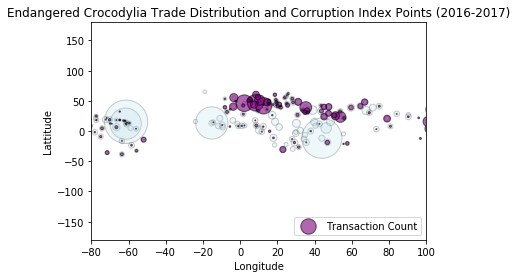

In [21]:
#######################################################
endangered_df=[]
#endangered species : App.=I
endangered_df=deduped_df.loc[(deduped_df['App.']=='I') ]#| (deduped_df['App.']=='II')]# & ((deduped_df['Purpose']=='T') | (deduped_df['Purpose']=='H'),]
#Commecial, Hunting Trophy usage : Purpose in 'T', 'H'
endangered_df=deduped_df.loc[(deduped_df['Purpose']=='T') | (deduped_df['Purpose']=='H')]  
#Limit Source to Wild and Captivity
endangered_df= endangered_df.loc[(deduped_df['Source']=='W') | (deduped_df['Source']=='C')| (deduped_df['Source']=='D')| (deduped_df['Source']=='F'),]
#Filter on Crocodylia
endangered_df= endangered_df.loc[(endangered_df['Class']=='Reptilia') & (endangered_df['Order']=='Crocodylia')]
endangered_df.groupby(['Term']).size().reset_index()

lanlon_df = pd.read_excel('country_lat_lon.xlsx') 
endangered_df=endangered_df.merge(lanlon_df, left_on='Importer', right_on='Country', how='left')

croco_bycountry_df=pd.DataFrame()
croco_bycountry_df2=pd.DataFrame()
croco_bycountry_df['trancount']=endangered_df.groupby(['Importer','Lattitude','Longitude'])['Order'].count().sort_values(ascending=False)
croco_bycountry_df.reset_index(inplace=True)

#corruption index
corruption_df=pd.read_csv('Corruption.csv')
corruption_df.head()
#lanlon_df.rename(columns={'Exporter':'Country'}, inplace=True)
corruption_df=corruption_df.merge(lanlon_df, left_on='Country', right_on='Name', how='left')
corruption_df.head()

#create the plot
x_axis = corruption_df["Longitude"]
data = corruption_df["Lattitude"]
size = (100/corruption_df["Corruption Index Points"])*10
croco_handle= plt.scatter(x_axis, data, marker='o', facecolors="lightblue", edgecolors="black", s=size, alpha=0.20)
plt.ylim(-180, 180)
plt.xlim(-80, 100)

x_axis = croco_bycountry_df["Longitude"]
data = croco_bycountry_df["Lattitude"]
size = croco_bycountry_df["trancount"]
croco_handle= plt.scatter(x_axis, data, marker='o', facecolors="Purple", edgecolors="black", s=size, alpha=0.60)
plt.ylim(-180, 180)
plt.xlim(-80, 100)

plt.xlabel("Longitude")
plt.ylabel("Lattitude")
plt.title("Endangered Crocodylia Trade Distribution and Corruption Index Points (2016-2017)")
plt.legend(handles=[croco_handle], loc="lower right" ).get_texts()[0].set_text('Transaction Count')
plt.savefig("corco_trans_corrupt_latlon.png")
plt.show()



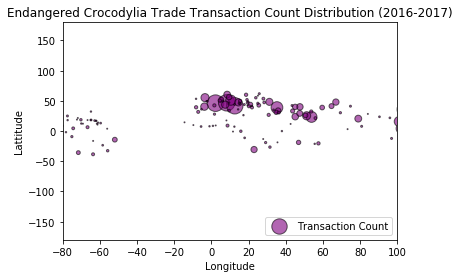

In [22]:
x_axis = croco_bycountry_df["Longitude"]
data = croco_bycountry_df["Lattitude"]
size = croco_bycountry_df["trancount"]
croco_handle= plt.scatter(x_axis, data, marker='o', facecolors="Purple", edgecolors="black", s=size, alpha=0.60)
plt.ylim(-180, 180)
plt.xlim(-80, 100)

plt.xlabel("Longitude")
plt.ylabel("Lattitude")
plt.title("Endangered Crocodylia Trade Transaction Count Distribution (2016-2017)")
plt.legend(handles=[croco_handle], loc="lower right" ).get_texts()[0].set_text('Transaction Count')
plt.savefig("corco_trans_latlon.png")
plt.show()

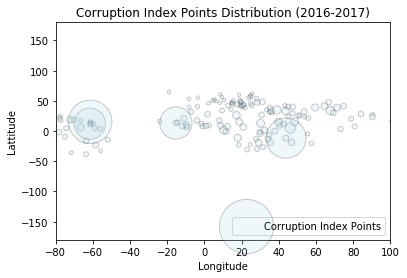

In [24]:


#Corruption Index Points
x_axis = corruption_df["Longitude"]
data = corruption_df["Lattitude"]
size = (100/corruption_df["Corruption Index Points"])*10
crrupt_handle= plt.scatter(x_axis, data, marker='o', facecolors="lightblue", edgecolors="black", s=size, alpha=0.20)
plt.ylim(-180, 180)
plt.xlim(-80, 100)


plt.xlabel("Longitude")
plt.ylabel("Lattitude")
plt.title("Corruption Index Points Distribution (2016-2017)")
plt.legend(handles=[crrupt_handle], loc="lower right" ).get_texts()[0].set_text('Corruption Index Points')
plt.savefig("corrupt_latlon.png")
plt.show()